[1, 'uniform', 'auto', 0.95473]
[1, 'uniform', 'ball_tree', 0.956644]
[1, 'uniform', 'kd_tree', 0.95473]
[1, 'uniform', 'brute', 0.95473]
[1, 'distance', 'auto', 0.95473]
[1, 'distance', 'ball_tree', 0.956644]
[1, 'distance', 'kd_tree', 0.95473]
[1, 'distance', 'brute', 0.95473]
[4, 'uniform', 'auto', 0.984572]
[4, 'uniform', 'ball_tree', 0.984572]
[4, 'uniform', 'kd_tree', 0.984572]
[4, 'uniform', 'brute', 0.984253]
[4, 'distance', 'auto', 0.98461]
[4, 'distance', 'ball_tree', 0.98461]
[4, 'distance', 'kd_tree', 0.98461]
[4, 'distance', 'brute', 0.984422]
[7, 'uniform', 'auto', 0.985492]
[7, 'uniform', 'ball_tree', 0.985548]
[7, 'uniform', 'kd_tree', 0.985492]
[7, 'uniform', 'brute', 0.985492]
[7, 'distance', 'auto', 0.985811]
[7, 'distance', 'ball_tree', 0.985792]
[7, 'distance', 'kd_tree', 0.985811]
[7, 'distance', 'brute', 0.985736]
[10, 'uniform', 'auto', 0.986261]
[10, 'uniform', 'ball_tree', 0.986261]
[10, 'uniform', 'kd_tree', 0.986261]
[10, 'uniform', 'brute', 0.986374]
[10, '

'""\nplt.subplot(1, 3, 1)\nplt.scatter(data_reduced[:,0],data_reduced[:,1],c=prediction)\nplt.title("Résultat pred")\nmaline = mpatches.Patch(color=\'yellow\', label=\'maline\')\nbenine = mpatches.Patch(color=\'purple\', label=\'benine\')\nplt.legend(handles=[maline,benine])\n\nplt.subplot(1, 3, 2)\nplt.scatter(data_reduced[:,0],data_reduced[:,1],c=y_test)\nplt.title("Résultat vrai")\nmaline = mpatches.Patch(color=\'yellow\', label=\'maline\')\nbenine = mpatches.Patch(color=\'purple\', label=\'benine\')\nplt.legend(handles=[maline,benine])\n\nplt.show()\n'

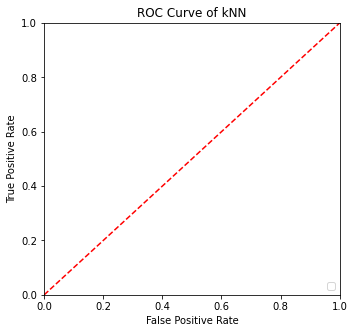

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.io as sp
import logging
import xlsxwriter

#traitement mat
cancercell=sp.loadmat('breastw.mat')
X = cancercell['X']
y = cancercell['y']
#print(cancercell)
y=np.reshape(y,(683,))
#Séparation des données d'apprentissage et des données tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
#fin traitement mat

plt.figure(figsize=(18,5))

plt.subplot(1, 3, 3)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')

logging.basicConfig(level=logging.ERROR)

i=1
#MC=np.zeros((48,4))

def create(row, col):
    return [[[]for _ in range(col)]  for _ in range(row)]


KN = range(1, 51, 3)
MC = create(2*len(KN)*4+1,4)
MC[0][0]='k (nb voisins)'
MC[0][1]='w (poids)'
MC[0][2]='a (algorithme))'
MC[0][3]='AUC'

for k in KN:
    for w in ['uniform','distance']:
        for a in ['auto','ball_tree','kd_tree','brute']:

            #MC[i,0]=[k,w,a]
            MC[i][0]= k
            MC[i][1]= w
            MC[i][2]= a

            #algo knn
            model = KNeighborsClassifier(n_neighbors=k, weights=w, algorithm=a)
            model.fit(X_train,y_train)
            prediction= model.predict(X_test)
            model_PCA = PCA(n_components=2)
            data_reduced = model_PCA.fit_transform(X_test)
            #fin algo knn

            #logging.debug('i=%d : k=%d, w=%s, a=%s' % (i, k, w, a))

            #print(model.predict_proba(X_test))
            y_scores = model.predict_proba(X_test)

            #graphique
            #  ROC curve
            fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
            roc_auc = auc(fpr, tpr)
            MC[i][3]=(round(roc_auc, 6))

            print(MC[i])
            #logging.debug('i=%d : AUC=%f' % (i, roc_auc))
            #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
            #plt.plot(fpr, tpr, 'b', label = 'AUC {}'.format(k) & '%0.4f' % roc_auc)
            #fin graphique
            i += 1 


workbook = xlsxwriter.Workbook('Comparaison matrice.xlsx')
worksheet = workbook.add_worksheet()
col = 0
for row, data in enumerate(MC):
    worksheet.write_row(row, col, data)
workbook.close()

print(MC)    

"""""
plt.subplot(1, 3, 1)
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=prediction)
plt.title("Résultat pred")
maline = mpatches.Patch(color='yellow', label='maline')
benine = mpatches.Patch(color='purple', label='benine')
plt.legend(handles=[maline,benine])

plt.subplot(1, 3, 2)
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=y_test)
plt.title("Résultat vrai")
maline = mpatches.Patch(color='yellow', label='maline')
benine = mpatches.Patch(color='purple', label='benine')
plt.legend(handles=[maline,benine])

plt.show()
"""

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, prediction)
print("Matrice de confusion :")
print(result)
result1 = classification_report(y_test, prediction)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,prediction)
print("Accuracy :",result2)

Matrice de confusion :
[[217   5]
 [  9 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       222
           1       0.96      0.93      0.94       120

    accuracy                           0.96       342
   macro avg       0.96      0.95      0.95       342
weighted avg       0.96      0.96      0.96       342

Accuracy : 0.9590643274853801
